# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

In [ ]:
!pip install easyagents >/dev/null

##### suppress package warnings, prepare matlab, if in colab: load additional packages for rendering

In [1]:
import sys
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

## Dry Run (very short training)

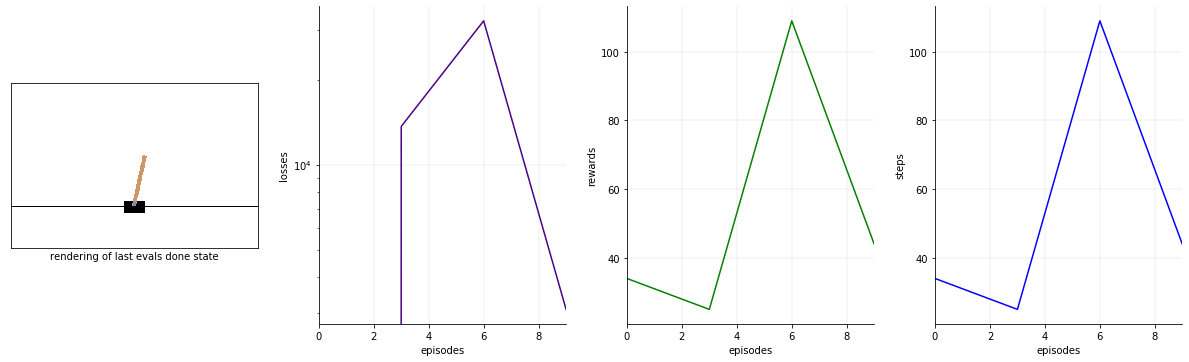

In [2]:
from easyagents.tfagents import PpoAgent
from easyagents.config import TrainingFast

ppoAgent = PpoAgent( gym_env_name='CartPole-v0', training=TrainingFast())
ppoAgent.train()

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

## Default training with a movie (on a self-defined network)

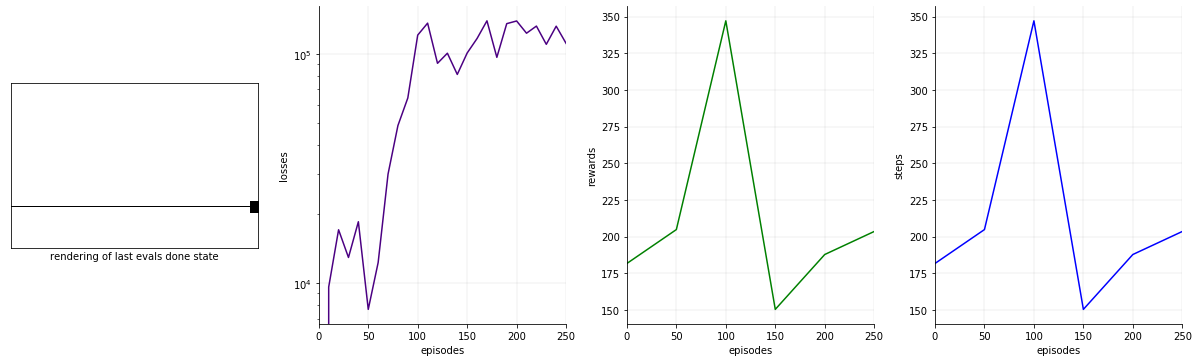

In [3]:
from easyagents.tfagents import PpoAgent

ppoAgent = PpoAgent( gym_env_name = 'CartPole-v0', fc_layers=(100, 50, 25) )
ppoAgent.train()

### Replot the training statistics

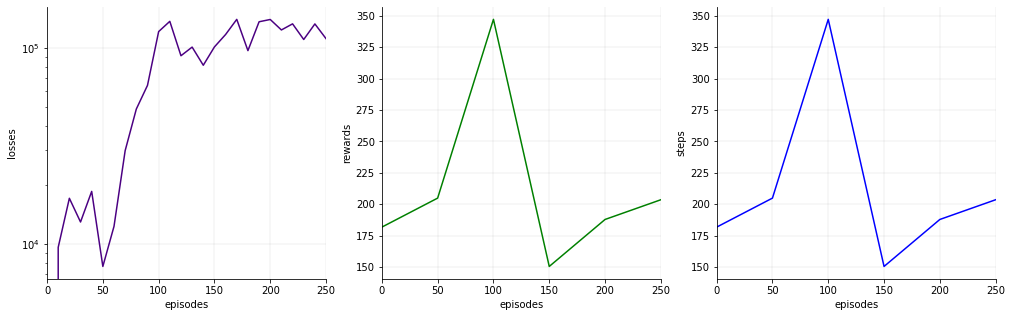

In [4]:
_ = ppoAgent.plot_episodes()

### Visualize the trained policy playing a game

In [5]:
ppoAgent.render_episodes_to_jupyter(num_episodes=1, fps=50)

W0727 15:32:02.708096 20048 ffmpeg.py:839] IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (400, 600) to (400, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to None (risking incompatibility). You may also see a FFMPEG warning concerning speedloss due to data not being aligned.


## Next: Custom training (self-defined training scheme & logging)

* see [Berater on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_berater.ipynb)
  (an example of a gym environment implementation based on a routing problem)

